<a href="https://colab.research.google.com/github/shitote/dist-repo/blob/main/Hate_speech_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load in the data.

In [2]:
# hate dataset.
hate_df = pd.read_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/hate.csv", encoding='latin-1') # Try reading with 'latin-1' encoding
hate_df.head()

,content,label
0,Every Kenyan know what follows these signature...,1
1,Nyaglet mbwakni https://t.co/Uo5B1uZkuk,1
2,Between this two sneakers which one is fake? n...,1
3,"Naskia mkiita huyu kijana Joel Ogolla mbwakni,...",1
4,Mauru na timbaa mbwakni?? https://t.co/kycrejNRv0,1


In [3]:
# non_hate dataset
non_hate_df = pd.read_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/non_hate.csv", encoding='latin-1')
non_hate_df.head()

,Content,label
0,Ijumaaa yetu imefika wana Simba!! Nunua tiketi...,0
1,Mwana Simba hakikisha mechi ya kesho kwa namna...,0
2,Rasmi leo najitangaza kuwa mimi ndo Msemaji bo...,0
3,Wana Simba tuje kwa wingi Uwanjani Ijumaa tush...,0
4,Konde Boy pekee anaeweza kwenda UTO ni yule al...,0


In [4]:
# Rename column for non_hate dataset
non_hate_df.rename(columns={'Content': 'content'}, inplace=True)
non_hate_df.head()

,content,label
0,Ijumaaa yetu imefika wana Simba!! Nunua tiketi...,0
1,Mwana Simba hakikisha mechi ya kesho kwa namna...,0
2,Rasmi leo najitangaza kuwa mimi ndo Msemaji bo...,0
3,Wana Simba tuje kwa wingi Uwanjani Ijumaa tush...,0
4,Konde Boy pekee anaeweza kwenda UTO ni yule al...,0


In [5]:
# Concatinate datasets
swahili_df = pd.concat([hate_df, non_hate_df], axis=0)
swahili_df.head()

,content,label
0,Every Kenyan know what follows these signature...,1
1,Nyaglet mbwakni https://t.co/Uo5B1uZkuk,1
2,Between this two sneakers which one is fake? n...,1
3,"Naskia mkiita huyu kijana Joel Ogolla mbwakni,...",1
4,Mauru na timbaa mbwakni?? https://t.co/kycrejNRv0,1


In [6]:
swahili_df.rename(columns={'content': 'text'}, inplace=True)
swahili_df.head()

,text,label
0,Every Kenyan know what follows these signature...,1
1,Nyaglet mbwakni https://t.co/Uo5B1uZkuk,1
2,Between this two sneakers which one is fake? n...,1
3,"Naskia mkiita huyu kijana Joel Ogolla mbwakni,...",1
4,Mauru na timbaa mbwakni?? https://t.co/kycrejNRv0,1


## Data Cleaning and Preprocessing

## Lowacasing all the letters

In [7]:
swahili_df['text'] = swahili_df['text'].str.lower()
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni https://t.co/uo5b1uzkuk,1
2,between this two sneakers which one is fake? n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni?? https://t.co/kycrejnrv0,1


## Remove hastags and mentions

In [8]:
import re

In [9]:
swahili_df['text'] =swahili_df['text'].apply(str)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni https://t.co/uo5b1uzkuk,1
2,between this two sneakers which one is fake? n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni?? https://t.co/kycrejnrv0,1


In [10]:
# Remove all mentions.
swahili_df['text'] = swahili_df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni https://t.co/uo5b1uzkuk,1
2,between this two sneakers which one is fake? n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni?? https://t.co/kycrejnrv0,1


In [11]:
# Remove all hashtags
swahili_df['text'] = swahili_df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni https://t.co/uo5b1uzkuk,1
2,between this two sneakers which one is fake? n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni?? https://t.co/kycrejnrv0,1


## Removing links

In [12]:
# Remove https links
swahili_df['text'] = swahili_df.apply(lambda row: re.sub(r"http\S+","", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake? n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni??,1


In [13]:
# Remove www. links
swahili_df['text'] = swahili_df.apply(lambda row: re.sub(r"www. \S+","", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake? n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni??,1


## Removing the punctuations

In [14]:
swahili_df['text'] = swahili_df.apply(lambda row: re.sub('[()!?]'," ", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni,1


In [15]:
swahili_df['text'] = swahili_df.apply(lambda row: re.sub('\[.*?\]'," ", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,"naskia mkiita huyu kijana joel ogolla mbwakni,...",1
4,mauru na timbaa mbwakni,1


In [16]:
## Removing all non-alphanumeric characters
swahili_df['text'] = swahili_df.apply(lambda row: re.sub("[^a-zA-Z0-9]"," ", row['text']),axis=1)
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1


In [17]:
# remove blank text rows
print("Total length before cleaning:", len(swahili_df))

blank_rows = swahili_df['text'].str.strip().eq('').fillna(True)
swahili_df = swahili_df[~blank_rows]

print("Total length after cleaning:", len(swahili_df))

Total length before cleaning: 48618
Total length after cleaning: 47726


## Checke and removeing all the duplicate values form the dataset

In [18]:
 # check for the total af duplicate values.
swahili_df['text'].duplicated().sum()

6229

In [19]:
# Remove duplicate values on the text column
swahili_df.drop_duplicates(subset=['text'], inplace=True)
swahili_df.head()

<ipython-input-19-2c781d1b12b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swahili_df.drop_duplicates(subset=['text'], inplace=True)


,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1


In [20]:
swahili_df['text'].duplicated().sum()

0

In [21]:
len(swahili_df)

41497

## Removing numerical values

In [22]:
def cleaning_number(data):
  return re.sub('[0-9]+', '', data)

swahili_df['text']= swahili_df['text'].apply(lambda x: cleaning_number(x))
swahili_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1


In [23]:
# Save the data
swahili_df.to_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/cleaned_swahili_df.csv", index=False)

In [24]:
# Load in the Cleaned dataset
cleaned_df = pd.read_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/cleaned_swahili_df.csv")
cleaned_df.head(), len(cleaned_df)

(                                                text label
 0  every kenyan know what follows these signature...     1
 1                                   nyaglet mbwakni      1
 2  between this two sneakers which one is fake  n...     1
 3  naskia mkiita huyu kijana joel ogolla mbwakni ...     1
 4                         mauru na timbaa mbwakni        1,
 41497)

## EDA

### Define and remove all the stop words in Kiswahili and English

In [25]:
cleaned_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1


In [26]:
# Check for duplicate based on text column
duplicate_rows = cleaned_df.duplicated(subset=['text'])

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)
print(len(cleaned_df))
cleaned_df = cleaned_df.drop_duplicates(subset=['text'])
print(len(cleaned_df))

Number of duplicate rows: 170
41497
41327


In [27]:
cleaned_df.head()

,text,label
0,every kenyan know what follows these signature...,1
1,nyaglet mbwakni,1
2,between this two sneakers which one is fake n...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1


In [28]:
eng_stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'wewe', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [29]:
STOPWORDS = set(eng_stopwordlist)
def cleaning_stopwords(text, stopwords):
  return " ".join([word for word in str(text).split() if word not in stopwords])
cleaned_df['text'] = cleaned_df['text'].apply(lambda text: cleaning_stopwords(text, STOPWORDS))
cleaned_df.head()

,text,label
0,every kenyan know follows signature lip moveme...,1
1,nyaglet mbwakni,1
2,two sneakers one fake ni gani mbwakni white am...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1


### Removing white white spaces.

In [30]:
def remove_whitespace(text):
  return " ".join(text.split())
cleaned_df['text'] = cleaned_df['text'].apply(lambda text: remove_whitespace(text))
cleaned_df.head(10)

,text,label
0,every kenyan know follows signature lip moveme...,1
1,nyaglet mbwakni,1
2,two sneakers one fake ni gani mbwakni white am...,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru na timbaa mbwakni,1
5,kenyan promoters huwa mbwakni sana,1
6,arsenali oeeee team mbwakni kabisaa,1
7,fuck finance bill,1
8,kwanza hizo yeezy slides zako ni mbwakni sijas...,1
9,ukinunua laptop luthuli alafu upate ni mbwakni...,1


In [31]:
swahili_stopwords = pd.read_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/swahili_stopwords.csv")
len(swahili_stopwords)

255

In [32]:
swa_stopwords = swahili_stopwords['StopWords'].tolist()

In [33]:
# Remove all swahili stopewords
STOPWORDS = set(swa_stopwords)
cleaned_df['text'] = cleaned_df['text'].apply(lambda text: cleaning_stopwords(text, STOPWORDS))
cleaned_df.head()

,text,label
0,every kenyan know follows signature lip moveme...,1
1,nyaglet mbwakni,1
2,two sneakers one fake gani mbwakni white gray,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru timbaa mbwakni,1


In [34]:
# save the dataset again
cleaned_df.to_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/swahili_nostop_df.csv")

### Removing most used words.

In [35]:
from collections import Counter
count = Counter()
for text in cleaned_df["text"].values:
    for word in text.split():
        count[word] += 1
count.most_common(10)

[('watu', 2820),
 ('mtu', 1931),
 ('leo', 1907),
 ('kuna', 1784),
 ('wako', 1499),
 ('ndio', 1469),
 ('tanzania', 1453),
 ('rais', 1431),
 ('serikali', 1424),
 ('siku', 1308)]

In [36]:
FREQWORDS = set([w for (w, wc) in count.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
cleaned_df["text"] = cleaned_df["text"].apply(lambda text: remove_freqwords(text))
cleaned_df.head()

,text,label
0,every kenyan know follows signature lip moveme...,1
1,nyaglet mbwakni,1
2,two sneakers one fake gani mbwakni white gray,1
3,naskia mkiita huyu kijana joel ogolla mbwakni ...,1
4,mauru timbaa mbwakni,1


### Plot a cloud of words for hate tweets

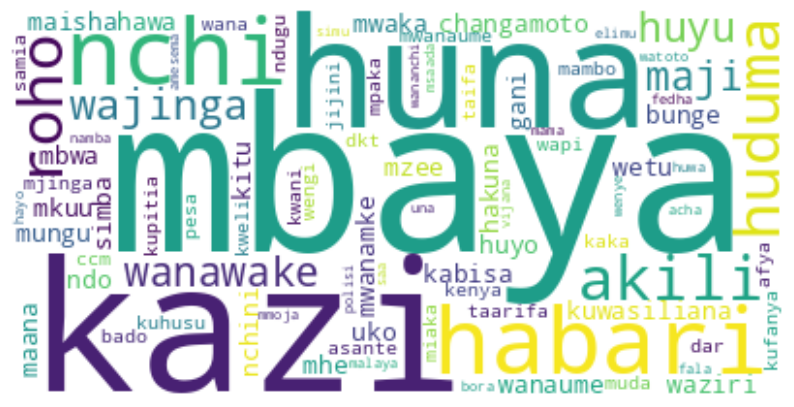

In [37]:
%matplotlib inline
from wordcloud import WordCloud
text = " ".join(" ".join(cat) if isinstance(cat, list) else cat for cat in cleaned_df.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
# Check if the dataset is balanced
cleaned_df['label'].value_counts()

label
0    22091
1    19235
o        1
Name: count, dtype: int64

In [39]:
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['label'] == 'o'].index)

In [40]:
cleaned_df['label'].value_counts()

label
0    22091
1    19235
Name: count, dtype: int64

In [41]:
# Shuffle the dataset
cleaned_df_shuffled = cleaned_df.sample(frac=1).reset_index(drop=True)
cleaned_df_shuffled.head()

,text,label
0,angalia game europa ukipiga mkwanja meridianbet,0
1,waziri mkuu mhe kassim majaliwa majaliwa anazi...,0
2,watakuita mchawi bahati mbaya uwe unatokea kan...,1
3,mliopo makazini hebu tuambieni kazi zinafanyik...,0
4,habari ahsante kuwasiliana changamoto maeneo h...,0


In [42]:
cleaned_df_shuffled.label.value_counts()

label
0    22091
1    19235
Name: count, dtype: int64

In [43]:
print(cleaned_df_shuffled['text'].dtypes)

object


In [44]:
#save the shuffled data
cleaned_df_shuffled.to_csv("/content/drive/MyDrive/swahili/data/data/final_datasets/shuffled_swahili_df.csv", index=False)

In [45]:
# Visualize random traning examples.
import random
random_index = random.randint(0, len(cleaned_df_shuffled))
for row in cleaned_df_shuffled[['text', 'label']][random_index:random_index+5].itertuples():
  _, text, label = row
  # Convert label to integer before comparison
  print(f'Labels: {label}', '(hate_speech)' if int(label) > 0 else '(Note hate_speech)')
  print(f'Text:\n{text}\n')
  print("----------------------\n")

Labels: 0 (Note hate_speech)
Text:
imeelezwa wastani watoto wanaozaliwa mkoani dar es salaam watoto sawa wanahitaji huduma watoto wachanga wenye matatizo mbalimbali mganga mkuu mkoa dkt mohammed mang una amesema vituo vinavyotoa huduma

----------------------

Labels: 0 (Note hate_speech)
Text:
eugene kabendera binafsi nakumbuka basil mramba mwenzake waliwahi kuwajibishwa kupewa kazi kufagia palestina hospitali sikumbuki kuona adhabu iliyotolewa viongozi wengi ngumu kutudanganya kuhusu utajiri walionao tunawaona nafasi

----------------------

Labels: 0 (Note hate_speech)
Text:
wafahamu wachezaji watano africa licha bora hawakuwahi kushinda tuzo caf

----------------------

Labels: 0 (Note hate_speech)
Text:
nimekuwa nikisikia raia wetu wengi wanapoongelea vikwazo wasanii maskani kuvuka boda huwa wanabeza uandishi hatuimbi vitu maana lyrics zetu ziko poor yani davido akiimba banana fall tunamsifia mnyama kauaaa mnyamwezi mwanetu akisema

----------------------

Labels: 0 (Note hate_spe

### Split the dataset into training and validation datasets

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Slipt the dataset
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    cleaned_df_shuffled['text'].to_numpy(),
    cleaned_df_shuffled['label'].to_numpy(),
    test_size=0.1,
    random_state=42
)
len(train_sentences), len(test_sentences)

(37193, 4133)

In [48]:
train_sentences[:5], train_labels[:5]

(array(['tunaohudhuria ruvu namungo lupaso hatuwezi sema kitu tunajua naibu waziri alitaka kusema wanaolalamika ujenzi uwanja wengi uwanjani huwa hawaendi x com mwanafa status',
        'mshenzi', 'mzee book hukulipa deni wildbeast',
        'funny enough ata wajinga huzeeka notion old people wise hunimaliza',
        'wenyeviti kamati kudumu bunge wakiongozwa mhe stanslaus nyongo mb washiriki kikao kuimarisha ushirikiano asasi kiraia azaki bunge tarehe septemba ukumbi msekwa jijini dodoma'],
       dtype=object),
 array(['0', '1', '1', '1', '0'], dtype=object))

## Convert Text to Numbers.

* Tokenization - Direxct mapping of tokens to numbers
* Embedding - Mapping of words to vectors

### Text Vectorization(Tokenization)

In [49]:
len(train_sentences[0]. split())

23

In [50]:
# Find the average number of tokens in the training datasets.
round(sum([len(str(i).split()) for i in train_sentences])/len(train_sentences))

12

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# set text vexctorization variables
max_vocab_lenght = 2000
max_length = 18

text_vectorizer = TextVectorization(max_tokens=max_vocab_lenght,
                                    output_mode='int',
                                    output_sequence_length=max_length,
                                    )

In [52]:
# Fit the vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [53]:
# Tokenize a sample sentence
sample_sentence = "huna heshima kabisa"
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(18,), dtype=int64, numpy=
array([  4, 172,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])>

In [54]:
# choose a random sentence from the training sentences
random_sentence = random.choice(train_sentences)
print(f'Original text: \n {random_sentence}\n\n Vectorized version:')
text_vectorizer([random_sentence])

Original text: 
 mechi kimaamuzi utaona ukubwa ubora wachezaji simba tunapolitaka jambo letu hakuna mwanadamu anaweza kutuzia wana simba karibuni new amaan complex njoeni kifua mbele hakuna ndege mgumu mbele simba insha allah tutafurahi

 Vectorized version:


<tf.Tensor: shape=(1, 18), dtype=int64, numpy=
array([[ 245,    1, 1896,    1,  756,  476,   35,    1,  235,  723,   28,
           1,  342,    1,   60,   35, 1039,  455]])>

In [55]:
# Get unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:10]
bottom_5_words = words_in_vocab[-5:]
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'10 most common words: {top_5_words}')
print(f'5 least common words: {bottom_5_words}')

Number of words in vocab: 2000
10 most common words: ['', '[UNK]', 'mbaya', 'kazi', 'huna', 'nchi', 'habari', 'roho', 'akili', 'wajinga']
5 least common words: ['wenzangu', 'wasomi', 'wasee', 'wakurugenzi', 'viungo']


### Create an Embedding

In [56]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_lenght,
                             output_dim=128,
                             input_length=max_length)
embedding

In [57]:
# visualize after embedding
print(f'Original text: \n {random_sentence} \
      \n\nEmbedded version: ')
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
 mechi kimaamuzi utaona ukubwa ubora wachezaji simba tunapolitaka jambo letu hakuna mwanadamu anaweza kutuzia wana simba karibuni new amaan complex njoeni kifua mbele hakuna ndege mgumu mbele simba insha allah tutafurahi       

Embedded version: 


<tf.Tensor: shape=(1, 18, 128), dtype=float32, numpy=
array([[[ 0.01922255,  0.01658586, -0.04092797, ...,  0.01417252,
          0.04751286, -0.01642136],
        [-0.04807996,  0.00587063, -0.03883238, ..., -0.0153926 ,
         -0.00255915,  0.01576792],
        [-0.03727337, -0.04972354, -0.02902224, ...,  0.00029619,
         -0.00049007,  0.0178962 ],
        ...,
        [ 0.02686287,  0.04873074,  0.01178901, ..., -0.00557039,
         -0.00713301,  0.03000962],
        [ 0.02247493, -0.0436913 , -0.04499825, ...,  0.02001118,
          0.01588962, -0.01330274],
        [ 0.01053152, -0.02725012,  0.0379635 , ..., -0.01765978,
         -0.03697469, -0.04820038]]], dtype=float32)>

## Modeling
### Baseline model

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [59]:
# Create a data pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [60]:
# Baseline model evaluation
baseline_score = model_0.score(test_sentences, test_labels)
print(f"baseline model score: {baseline_score*100:.2f}%")

baseline model score: 86.81%


In [61]:
# Make predictions
baseline_preds = model_0.predict(test_sentences)
baseline_preds[:20]

array(['1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '1'], dtype='<U1')

In [62]:
test_sentences[:20]

array(['njaa hasira kombinenga kali mzee wangu ngoma uliichora verse izi ukiwa mood gani',
       'john heche akiwaanika vigogo tuhuma mgodi north via', 'kaka', '',
       'dem ako mimba anaezakuwa ukimwi',
       'mbaba katulia anaenjoy kiss huyo maza nae mnyonge wakat amekaa vitu glass mezan hyu sister angejua maana kua kipofu aisee',
       'eeeh bro',
       'lamine yamal join serious club like chelsea wants achieve great legacy win champion league',
       'umesha pijika alafu anakuja mvutabangi anakwambiya towaulichonacho kinachofuata kilammota atamiliki',
       'tuzo caf mshindi hapatikani kupiga kura links zetu bali wapiga kura kamati ufundi caf waandishi habari makocha wakuu manahodha klabu zilizoshiriki michuano ngoma haina mambo links tuendelee miamala simbanking kupitia',
       'walimwengu wameburudika', 'mbona kaka kaanza gia mno',
       'wanangu kupika shida mchawi kuosha vyombo acha niwashe pikipiki nikale mgahawani',
       'seychelles limekuwa taifa punde kujitosa k

In [63]:
# Model Evaluation based on: accuracy score, precision score, recall, f1_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculate model accuracy, precision, recall and f1 score of a binary classification model.
  """
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
      y_true,
      y_pred,
      average="weighted")
  model_results = {
      "accuracy": model_accuracy,
      "precision": (model_precision)*100,
      "recall": (model_recall)*100,
      "f1": (model_f1)*100
  }
  return model_results


In [64]:
# Make results.
baseline_results = calculate_results(test_labels, baseline_preds)
baseline_results

{'accuracy': 86.81345269779821,
 'precision': 87.31148357109659,
 'recall': 86.81345269779821,
 'f1': 86.81818663362053}

### SVM

**A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs. SVMs are widely adopted across disciplines such as healthcare, natural language processing, signal processing applications, and speech & image recognition fields**

In [65]:
%%time
from sklearn.linear_model import SGDClassifier
model_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SGDClassifier())
])

# fit the model
model_1.fit(train_sentences, train_labels)

CPU times: user 648 ms, sys: 86.9 ms, total: 735 ms
Wall time: 718 ms


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SGDClassifier())])

In [66]:
model_1.score(test_sentences, test_labels)

0.9438664408420034

In [67]:
# Make Predictions
model_1_preds = model_1.predict(test_sentences)
model_1_preds[:20]

array(['1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '1', '1'], dtype='<U1')

In [68]:
model_1_results = calculate_results(y_true=test_labels,
                                     y_pred=model_1_preds)
model_1_results

{'accuracy': 94.38664408420034,
 'precision': 94.40126859345855,
 'recall': 94.38664408420034,
 'f1': 94.38219259424555}

In [69]:
# Find the classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, model_1_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2190
           1       0.95      0.93      0.94      1943

    accuracy                           0.94      4133
   macro avg       0.94      0.94      0.94      4133
weighted avg       0.94      0.94      0.94      4133



### ⏳Search for optimal parameters for SVM algotithm

In [70]:
# Vectorize the text data.
%%time
tfv = TfidfVectorizer(analyzer='word',
                      ngram_range=(1, 3), use_idf=1, smooth_idf=1,
                      sublinear_tf=1)
tfv.fit(pd.concat([pd.Series(train_sentences), pd.Series(test_sentences)]))
x_train_tfv = tfv.transform(train_sentences)
x_test_tfv = tfv.transform(test_sentences)

x_train_tfv.shape, x_test_tfv.shape

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


CPU times: user 4.54 s, sys: 217 ms, total: 4.76 s
Wall time: 4.77 s


((37193, 772502), (4133, 772502))

In [71]:
from sklearn import svm

In [72]:
X = x_train_tfv
y = cleaned_df_shuffled['label']

In [73]:
# %%time
# kernels = ['linear', 'rbf', 'poly', 'sigmoid']
# for kernel in kernels:
#   svc = svm.SVC(kernel=kernel)
#   svc.fit(x_train_tfv, train_labels)
#   # Move the plot function inside the loop to have access to the fitted svc object
#   # Create a mesh to plot in
#   x_min, x_max = x_train_tfv[:, 0].min() - 1, x_train_tfv[:, 0].max() + 1 # Use x_train_tfv for dimensions
#   y_min, y_max = x_train_tfv[:, 1].min() - 1, x_train_tfv[:, 1].max() + 1 # Use x_train_tfv for dimensions
#   h = (x_max - x_min)/100
#   xx , yy = np.meshgrid(np.arange(x_min, x_max, h),
#                         np.arange(y_min, y_max, h))
#   plt.subplot(1, 1, 1)
#   Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
#   Z = Z.reshape(xx.shape)
#   plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
#   plt.scatter(x_train_tfv[:, 0], x_train_tfv[:, 1], c=train_labels, cmap=plt.cm.Paired) # Use training data for plotting
#   plt.xlabel('Sepal length')
#   plt.ylabel('Sepal width')
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())
#   plt.xticks(())
#   plt.yticks(())
#   plt.title('kernel=' + str(kernel)) # Set the title for each plot
#   plt.show()

### Logistic regresion
**Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.**


In [74]:
from sklearn.linear_model import LogisticRegression
model_logisctic = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

model_logisctic.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [75]:
# find the model score
model_logisctic.score(test_sentences, test_labels)

0.9378175659327365

In [76]:
# make predictins
model_logisctic_preds = model_logisctic.predict(test_sentences)
model_logisctic_preds[:20]

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '1', '1'], dtype=object)

In [77]:
# model evaluation
model_logisctic_results = calculate_results(y_true=test_labels,
                                             y_pred=model_logisctic_preds)
model_logisctic_results

{'accuracy': 93.78175659327364,
 'precision': 93.79450996120563,
 'recall': 93.78175659327364,
 'f1': 93.77694924594242}

#### ⌛ Logistic regression hyperparameters

In [78]:
from sklearn.model_selection import GridSearchCV
small_param_grid = [
    {
        'tfidf__ngram_range': [(1, 1)],
        'tfidf__stop_words': [None],
        'tfidf__tokenizer': [None],
        'tfidf__use_idf': [False],
        'tfidf__norm': [None],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'tfidf__ngram_range': [(1, 1)],
        'tfidf__stop_words': [None],
        'tfidf__tokenizer': [None],
        'tfidf__use_idf': [False],
        'tfidf__norm': [None],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]

lr_grid_search = GridSearchCV(model_logisctic, small_param_grid,
                              cv=5,
                              scoring='accuracy',
                              verbose=True)
lr_grid_search.fit(train_sentences, train_labels)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'clf__penalty': ['l1', 'l2'],
                          'tfidf__ngram_range': [(1, 1)], 'tfidf__norm': [None],
                          'tfidf__stop_words': [None],
                          'tfidf__tokenizer': [None],
                          'tfidf__use_idf': [False]},
                         {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'clf__penalty': ['l1', 'l2'],
                          'tfidf__ngram_range': [(1, 1)], 'tfidf__norm': [None],
                          'tfidf__stop_words': [None],
                          'tfidf__tokenizer': [None],
                          'tfidf__use_idf': [False]}],
             scoring='accuracy', verbose=True)

In [79]:
# score the model
lr_grid_search.score(test_sentences, test_labels)

0.9494314057585289

In [80]:
# make predictions
lr_grid_search_preds = lr_grid_search.predict(test_sentences)
lr_grid_search_preds[:10]

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0'], dtype=object)

In [81]:
# evaluate the model
lr_grid_search_results = calculate_results(y_true=test_labels,
                                           y_pred=lr_grid_search_preds)
lr_grid_search_results

{'accuracy': 94.9431405758529,
 'precision': 94.96137047080745,
 'recall': 94.9431405758529,
 'f1': 94.93882467765191}

In [82]:
# Find the best params
lr_grid_search.best_params_

{'clf__C': 1,
 'clf__penalty': 'l2',
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': None,
 'tfidf__stop_words': None,
 'tfidf__tokenizer': None,
 'tfidf__use_idf': False}

### Decision Tree

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.**

In [83]:
# DT model initialization and training.
%%time
from sklearn.tree import DecisionTreeClassifier

model_dt = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])
model_dt.fit(train_sentences, train_labels)

CPU times: user 27.5 s, sys: 17.7 ms, total: 27.5 s
Wall time: 27.7 s


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [84]:
# score the model
model_dt.score(test_sentences, test_labels)

0.9349141059762884

In [85]:
# make predictions
model_dt_preds = model_dt.predict(test_sentences)
model_dt_preds[:10]

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0'], dtype=object)

In [86]:
test_labels[:10]

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0'], dtype=object)

In [87]:
# Evaluate the dt model
model_dt_results = calculate_results(y_true=test_labels,
                                     y_pred=model_dt_preds)
model_dt_results

{'accuracy': 93.49141059762884,
 'precision': 93.49093579502869,
 'recall': 93.49141059762884,
 'f1': 93.4911237777309}

In [88]:
# comapre the cost-complexity prunning path
%%time
tree_model = model_dt.named_steps['clf']
path = tree_model.cost_complexity_pruning_path(x_train_tfv, train_labels)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: user 3min 8s, sys: 86.7 ms, total: 3min 8s
Wall time: 3min 9s


Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

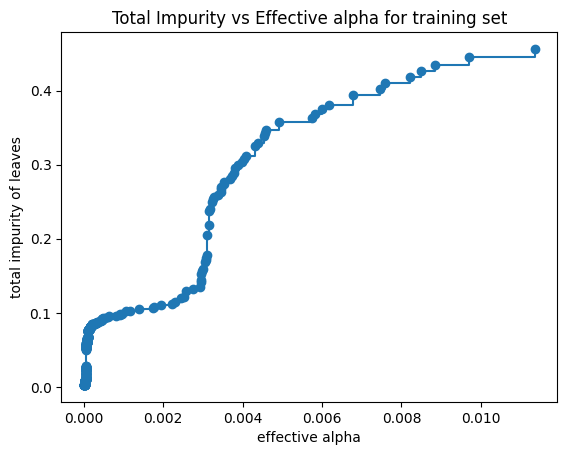

In [89]:
# plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs Effective alpha for training set')

In [90]:
#nfind the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]
optimal_ccp_alpha

0.0

In [91]:
%%time
tree_model.set_params(ccp_alpha=optimal_ccp_alpha)
tree_model = tree_model.fit(x_train_tfv, train_labels)

CPU times: user 3min 9s, sys: 128 ms, total: 3min 9s
Wall time: 3min 10s


In [92]:
# tree model score
tree_model.score(x_test_tfv, test_labels)

0.941204935881926

In [93]:
# make predictions
tree_model_preds = tree_model.predict(x_test_tfv)
tree_model_preds[:10]

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0'], dtype=object)

In [94]:
# evaluate the model
tree_model_results = calculate_results(y_true=test_labels,
                                       y_pred=tree_model_preds)
tree_model_results

{'accuracy': 94.1204935881926,
 'precision': 94.12067459036382,
 'recall': 94.1204935881926,
 'f1': 94.1205785622762}

### RandomForestClassifier

In [95]:
%%time
from sklearn.ensemble import RandomForestClassifier
model_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
model_rf.fit(train_sentences, train_labels)

CPU times: user 1min 59s, sys: 204 ms, total: 1min 59s
Wall time: 1min 59s


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [96]:
# Random forest model score
model_rf_score = model_rf.score(test_sentences, test_labels)
print(f"Random forest model score: {model_rf_score*100:.2f}%")

Random forest model score: 94.14%


In [99]:
model_rf_score = model_rf.score(train_sentences, train_labels)
print(f"Random forest model score: {model_rf_score*100:.2f}%")

Random forest model score: 99.78%


In [97]:
# Make predictions
model_rf_preds = model_rf.predict(test_sentences)
model_rf_preds[:10]

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0'], dtype=object)

In [98]:
# Evaluate the model
model_rf_results = calculate_results(y_true=test_labels,
                                     y_pred=model_rf_preds)
model_rf_results

{'accuracy': 94.14468908782966,
 'precision': 94.15005932835118,
 'recall': 94.14468908782966,
 'f1': 94.14595998354717}

In [102]:
model_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs= -1, random_state=42))
])
model_rf.fit(train_sentences, train_labels)
model_rf_score = model_rf.score(test_sentences, test_labels)
print(f"Random forest model score: {model_rf_score*100:.2f}%")

Random forest model score: 94.29%
